In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import time
import scipy.stats
import pandas as pd
import random
import seaborn as sns

### Method Of Moments

In [2]:
x = np.genfromtxt('data/input.csv', delimiter=',')
x.shape

(20000, 9)

In [3]:
simulation = np.genfromtxt('data/output.csv', delimiter=',')
simulation.shape

(20000,)

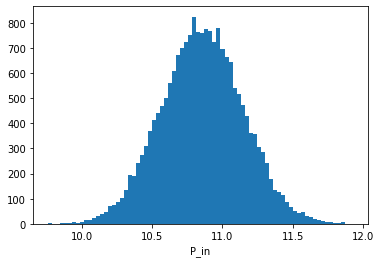

In [4]:
# Plot historgram
plt.hist(simulation, bins = 'auto')
plt.xlabel('P_in')
plt.show()

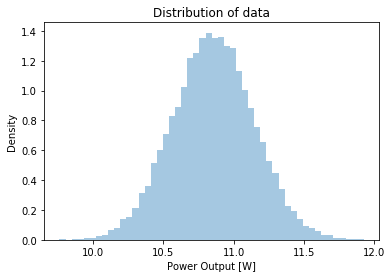

In [5]:
test = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel = "Power Output [W]", label="Density")
test.set_title('Distribution of data')
test.set_ylabel('Density')
plt.savefig('Data/Plots/hist_simulation.png')

In [6]:
from MoM_class import Method_of_Moments

In [7]:
MoM = Method_of_Moments(simulation)

In [8]:
simulation.sort()

In [10]:
dist_names = ['norm', 'beta', 'gamma', 'lognorm']
parameters = []

**Log Likelihood of FIT**

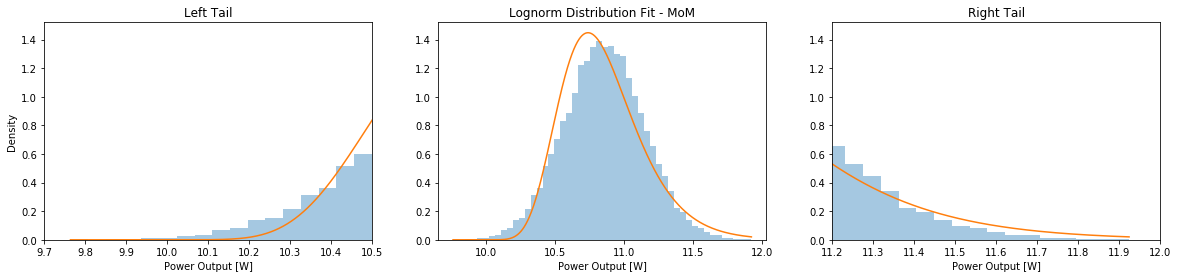

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
# Central Plot - Full Distribution
normal_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]',  ax=ax2)
ax2.plot(simulation, scipy.stats.lognorm.pdf(simulation, *params_lognorm))
normal_fit.set_title('Lognorm Distribution Fit - MoM')

# Left Plot - Left Tail
left_tail = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]',  ax=ax1)
ax1.plot(simulation, scipy.stats.lognorm.pdf(simulation, *params_lognorm))
left_tail.set_title('Left Tail')
left_tail.set_ylabel('Density')
ax1.set_xlim([9.7, 10.5])

# Right Plot - Right Tail
right_tail = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]',  ax=ax3)
ax3.plot(simulation, scipy.stats.lognorm.pdf(simulation, *params_lognorm))
right_tail.set_title('Right Tail')
ax3.set_xlim([11.2, 12])
plt.savefig('Data/Plots/MoM_lognorm.png')
plt.show()

### Normal Distribution

In [11]:
params_normal = MoM.norm_from_moments()
parameters.append(params_normal)
params_normal

(10.855754143885084, 0.289212270506663)

In [11]:
np.sum(np.log(scipy.stats.norm.pdf(simulation[1:-1], *params_normal)))

-3553.577563013328

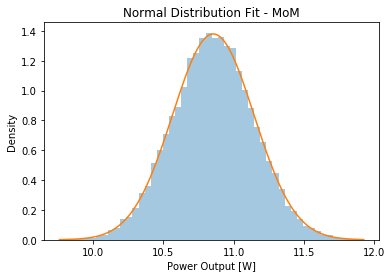

In [12]:
norm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal))
norm_fit.set_title('Normal Distribution Fit - MoM')
norm_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Normal.png')

### Beta Distribution

In [15]:
params_beta = MoM.beta_from_moments()
parameters.append(params_beta)
params_beta

(6.543229995890743, 6.402685874570016, 9.763923621594225, 2.1602092690086625)

In [14]:
np.sum(np.log(scipy.stats.beta.pdf(simulation[1:-1], *params_beta)))

-3730.3395271427107

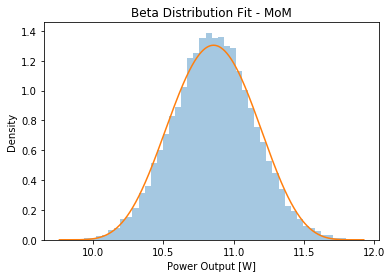

In [15]:
beta_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.beta.pdf(simulation, *params_beta))
beta_fit.set_title('Beta Distribution Fit - MoM')
beta_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Beta.png')

### Gamma Distribution

In [20]:
params_gamma = MoM.gamma_from_moments()
parameters.append(params_gamma)
params_gamma

(14.252039976878569, 9.763923621594225, 0.0766087187562035)

In [17]:
### Log Likelihood
np.sum(np.log(scipy.stats.gamma.pdf(simulation[1:], *params_gamma)))

-4291.132143962901

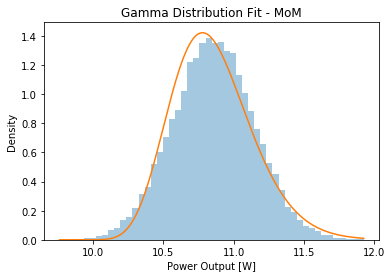

In [18]:
gamma_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.gamma.pdf(simulation, *params_gamma))
gamma_fit.set_title('Gamma Distribution Fit - MoM')
gamma_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Gamma.png')

### LogNormal Distribution

In [23]:
params_lognorm = MoM.lognorm_from_moments()
parameters.append(params_lognorm)
params_lognorm

(0.271691047937462, 9.763923621594225, 1.0522678089321305)

In [20]:
np.sum(np.log(scipy.stats.lognorm.pdf(simulation[1:-1], *params_lognorm)))

-5325.8564613954095

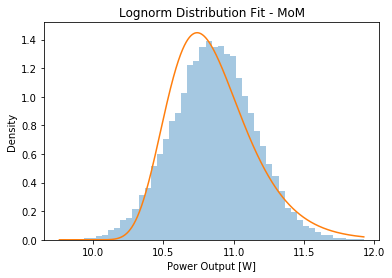

In [21]:
lognorm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.lognorm.pdf(simulation, *params_lognorm))
lognorm_fit.set_title('Lognorm Distribution Fit - MoM')
lognorm_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Lognorm.png')

In [22]:
parameters

[(10.855754143885084, 0.289212270506663),
 (6.543229995890743, 6.402685874570016, 9.763923621594225, 2.1602092690086625),
 (14.252039976878569, 9.763923621594225, 0.0766087187562035),
 (0.271691047937462, 9.763923621594225, 1.0522678089321305)]

In [23]:
results = pd.DataFrame()
results['Distribution'] = dist_names
results['Parameters'] = parameters
results

,Distribution,Parameters
0,norm,"(10.855754143885084, 0.289212270506663)"
1,beta,"(6.543229995890743, 6.402685874570016, 9.76392..."
2,gamma,"(14.252039976878569, 9.763923621594225, 0.0766..."
3,lognorm,"(0.271691047937462, 9.763923621594225, 1.05226..."


In [24]:
from helper_functions import qqplot

In [25]:
def qqplot(data, best_options, n_distributions, title, name_file):
    """
    QQ Plot: Comment this!
    Inputs:
        - data: Simulated data. Values of the Power output.
        - best_options: dataframe with the results of the fit -> columns |Distribution | Parameters |
            * Distribution: string with the name of the fitted distribution
            * Parameters: tuple with the values of the distribution parameters
        - n_distributions: number of distributions desired to be plotted, it should be a number smaller than the number of rows
                           in the 'best_options' dataframe.
        - title: String that will be the title of the plot.
        - name_file: string that will be the name og the saved file. 
    """
    # Cutoffs
    percentile_bins = np.linspace(0,100,51)
    percentile_cutoffs = np.percentile(data, percentile_bins)
    
    # Alocate memory
    percentile_data = np.zeros((n_distributions, 2000))
    data_cutoffs = np.zeros((n_distributions, 51))
    names = []
    min_line = 999999
    MAX_line = -999999
    
    for i in range(n_distributions):
        
        # Distribution Values
        name_dist = best_options.iloc[i]['Distribution']
        names.append(name_dist)
        
        parameters_dist = best_options.iloc[i]['Parameters']
        class_dist = getattr(scipy.stats, name_dist)
        
        percentile_data[i] = class_dist.rvs(*parameters_dist, size = 2000)
        data_cutoffs[i] = np.percentile(percentile_data[i], percentile_bins)
               
        #Plot size
        if math.floor(min(percentile_data[i])) < min_line:
            min_line = math.floor(min(percentile_data[i]))
        if math.ceil(max(percentile_data[i])) > MAX_line:
            MAX_line = math.ceil(max(percentile_data[i]))
    
    min_line = 9.5
    MAX_line = 12.5
    #Plot
    f, ax = plt.subplots(2,2,figsize=(12,12))
    colors = ['orange', 'blue', 'green', 'yellow', 'red', 'pink']
    indexes = [(0,0),(0,1),(1,0),(1,1)]
    for i in range(n_distributions):
        ax[indexes[i]].plot([min_line, MAX_line], [min_line, MAX_line], ls="--", c=".3")
        ax[indexes[i]].scatter(percentile_cutoffs, data_cutoffs[i], c=colors[i], label = names[i] + ' Distribution', s = 40)
        ax[indexes[i]].legend()

    f.suptitle(title, fontsize=15, y=0.93)
    f.text(0.5, 0.07, 'Theoretical cumulative distribution', ha='center', fontsize = 13)
    f.text(0.06, 0.5, 'Observed cumulative distribution', va='center', rotation='vertical', fontsize=13)
    #ax.set_ylabel('Observed cumulative distribution')
    plt.savefig('Data/Plots/'+name_file+".png")
    plt.show()

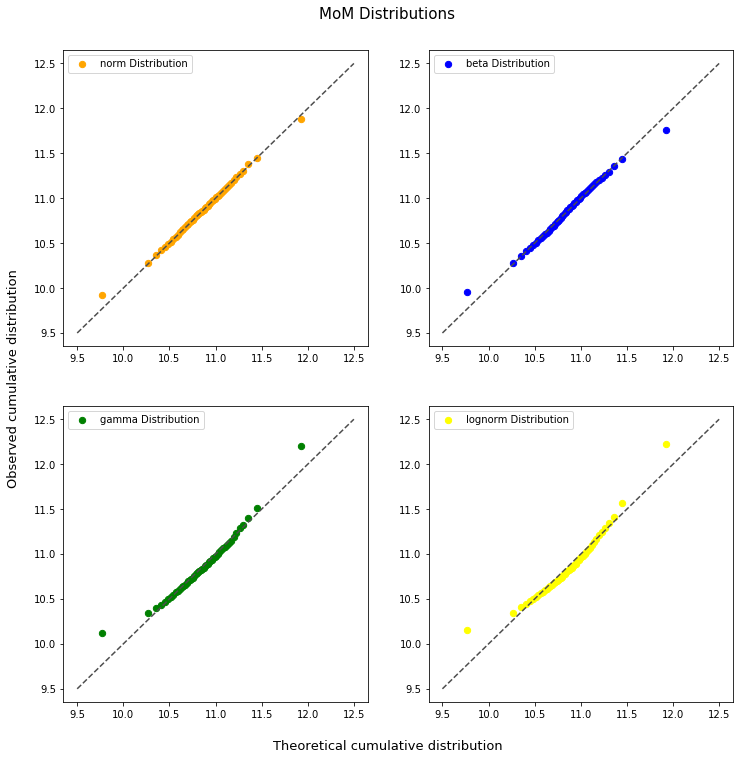

In [26]:
qqplot(simulation, results, 4,"MoM Distributions", "MoM_qq")

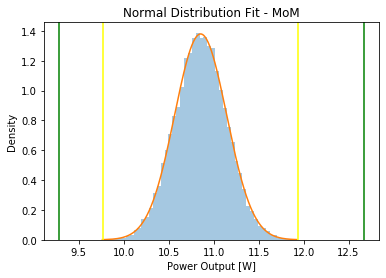

In [27]:
norm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal))
norm_fit.set_title('Normal Distribution Fit - MoM')
norm_fit.set_ylabel('Density')
plt.axvline(x=9.28592305, color='green')
plt.axvline(x=12.66975792, color='green')
plt.axvline(x=9.77066328, color='yellow')
plt.axvline(x=11.94185858, color='yellow')
plt.savefig('Data/Plots/CP.png')
plt.show()


In [28]:
params_uniform = uniform_from_moments(simulation)
params_uniform

NameError: name 'uniform_from_moments' is not defined

In [ ]:
uniform_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.uniform.pdf(simulation, *params_uniform))
uniform_fit.set_title('Uniform Distribution Fit - MoM')
uniform_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Uniform.png')

In [ ]:
def log_likelihood_foo(data, parameters):
    return np.sum(np.log(dist.pdf(data[1:-1], *parameters)))

def get_parameters(data, method, distribution):
    if method == 'MLE':
        dist = getattr(scipy.stats, distribution)
        return dist.fit(data)
    else: #'MoM'
        MoM = Method_of_Moments(data)
        method_to_call = getattr(Method_of_Moments, distribution + '_from_moments')
        return MoM.method_to_call()

In [34]:
dist = getattr(MoM, 'norm_from_moments')
param = dist()
param

(10.855754143885084, 0.289212270506663)

In [45]:
def compute_chi_square(data):
    #y,size,_ = standarize(data, 0.99, 0.01)
    size = len(data)
    y = data # Check this
    #dist_names = ['weibull_min', 'norm', 'weibull_max', 'beta', 'invgauss',
    #              'uniform', 'gamma', 'expon', 'lognorm', 'pearson3', 'triang']
    dist_names = ['norm_from_moments', 'beta_from_moments', 'gamma_from_moments', 'lognorm_from_moments']
    
    chi_square_statistics = []
    #log_likelihood = []
    parameters = []
    
    # Bins
    percentile_bins = np.linspace(0,100, 11)
    percentile_cutoffs = np.percentile(y, percentile_bins)
    obs_frequency, _ = np.histogram(y, bins=percentile_cutoffs)
    cum_obs_frequency = np.cumsum(obs_frequency)
    
    # Check candidate distributions
    for distribution in dist_names:
        # Set up candidate distribution
        
        # param = get_parameters(data, method, distribution)
        dist = getattr(scipy.stats, distribution.split('_')[0])
        param_dist = getattr(MoM, distribution)
        param = param_dist()
        parameters.append(param)
        #log_likelihood.append(np.sum(np.log(dist.pdf(y, *param))))
        print('Distribution: ' + distribution + ' || Parameters: ' + str(param))# + '|| Log-likelihood: ' + 
              #str(log_likelihood) + '\n')
        
        # CDF
        cdf_fit = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins)-1):
            expected_cdf_area = cdf_fit[bin+1] - cdf_fit[bin]
            expected_frequency.append(expected_cdf_area)
        
        # Chi-Square
        expected_frequency = np.array(expected_frequency) * size
        cum_expected_frequency = np.cumsum(expected_frequency)
        #ss = round(sum (((cum_expected_frequency - cum_obs_frequency) ** 2) / cum_obs_frequency), 0)
        ss = sum (((cum_expected_frequency - cum_obs_frequency) ** 2) / cum_obs_frequency)
        chi_square_statistics.append(ss)
    
    # Sort
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    #results['Log_likelihood'] = log_likelihood
    results['Chi_square'] = chi_square_statistics
    results['Parameters'] = parameters
    results.sort_values(['Chi_square'], inplace=True)
    
    print('\nDistributions listed by Goodness of Fit:')
    print('..........................................')
    print(results)  
    
    return results

In [39]:
a = 'asd_asd'
a.split('_')[0]

'asd'

In [47]:
results = compute_chi_square(simulation)

Distribution: norm_from_moments || Parameters: (10.855754143885084, 0.289212270506663)
Distribution: beta_from_moments || Parameters: (6.543229995890743, 6.402685874570016, 9.763923621594225, 2.1602092690086625)
Distribution: gamma_from_moments || Parameters: (14.252039976878569, 9.763923621594225, 0.0766087187562035)
Distribution: lognorm_from_moments || Parameters: (0.271691047937462, 9.763923621594225, 1.0522678089321305)

Distributions listed by Goodness of Fit:
..........................................
           Distribution  Chi_square  \
0     norm_from_moments    0.376370   
1     beta_from_moments   27.946898   
2    gamma_from_moments  242.246166   
3  lognorm_from_moments  553.603727   

                                          Parameters  
0            (10.855754143885084, 0.289212270506663)  
1  (6.543229995890743, 6.402685874570016, 9.76392...  
2  (14.252039976878569, 9.763923621594225, 0.0766...  
3  (0.271691047937462, 9.763923621594225, 1.05226...  


In [49]:
results
results.to_csv('Data/MoM_table.csv',header=None, index=None)